In [1]:
import os, sys
import numpy as np
import mxnet as mx

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from datetime import datetime

sys.path.append("../python/")
from date_format_translator_attention import *
from utils import *

### Params

In [ ]:
N = 1000
N_train = int(N * .9)
N_validation = N - N_train

in_seq_len = 32
out_seq_len = 32

### Data generation

In [3]:

X, Y, Z, chars, char_indices, indices_char = generate_date_data(N)

# Split data
X_train, X_validation, Y_train, Y_validation, Z_train, Z_validation = \
    train_test_split(X, Y, Z, train_size = N_train)

# Create dataloader
tr_set = gluon.data.ArrayDataset(X_train, Y_train, Z_train)
tr_data_iterator = gluon.data.DataLoader(tr_set, batch_size=256, shuffle=True)

te_set =gluon.data.ArrayDataset(X_validation, Y_validation, Z_validation)
te_data_iterator = gluon.data.DataLoader(te_set, batch_size=256, shuffle=True)

/opt/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Define model, trainer, and loss

In [5]:
ctx = mx.gpu()
model = format_translator(300, in_seq_len, out_seq_len, len(chars), ctx)
model.collect_params().initialize(mx.init.Xavier(), ctx = ctx)

trainer = gluon.Trainer(model.collect_params(), 'rmsprop')
loss = gluon.loss.SoftmaxCrossEntropyLoss(axis = 2, sparse_label = False)

### Train model

In [ ]:
res = train(model, tr_data_iterator, te_data_iterator \
          , trainer, loss, char_indices, indices_char
          , epochs= 300, ctx = ctx, output_file_name = '../models/format_tranlator_{}'.format(datetime.now().strftime('%Y%m%d')))

☒ 2003-December-28 Sun = 23/28/2003, sunday(12/28/2003, sunday) 0
☑ 2003-July-22 Tue = 07/22/2003, tuesday(07/22/2003, tuesday) 1
☒ 2008-October-13 Mon = 03/18/2003, monday(10/13/2008, monday) 0
☒ 2011-January-10 Mon = 01/11/2000, monday(01/10/2011, monday) 0
☒ 2012-July-16 Mon = 06/27/2006, monday(07/16/2012, monday) 0
☒ 2012-September-30 Sun = 09/23/2009, sunday(09/30/2012, sunday) 0
☒ 2011-August-29 Mon = 08/29/2008, monday(08/29/2011, monday) 0
☒ 2009-February-09 Mon = 09/20/209, monday(02/09/2009, monday) 0
☒ 2012-April-06 Fri = 04/26/2004, friday(04/06/2012, friday) 0
☒ 2005-July-08 Fri = 05/08/2008, friday(07/08/2005, friday) 0
Epoch 0. Train Loss: 0.119648464, Test Loss : 0.1484165
Epoch 1. Train Loss: 0.115584336, Test Loss : 0.17849718
Epoch 2. Train Loss: 0.1356239, Test Loss : 0.41998872
Epoch 3. Train Loss: 0.14000238, Test Loss : 0.11697188
Epoch 4. Train Loss: 0.09727065, Test Loss : 0.115161344
Epoch 5. Train Loss: 0.12412268, Test Loss : 0.15998113
Epoch 6. Train Loss:

☑ 2011-February-08 Tue = 02/08/2011, tuesday(02/08/2011, tuesday) 1
☑ 2011-October-30 Sun = 10/30/2011, sunday(10/30/2011, sunday) 1
☑ 2002-October-17 Thu = 10/17/2002, thursday(10/17/2002, thursday) 1
☑ 2006-August-26 Sat = 08/26/2006, saturday(08/26/2006, saturday) 1
☑ 2003-November-04 Tue = 11/04/2003, tuesday(11/04/2003, tuesday) 1
☑ 2007-March-05 Mon = 03/05/2007, monday(03/05/2007, monday) 1
Epoch 60. Train Loss: 0.018212743, Test Loss : 0.019315822
Epoch 61. Train Loss: 0.022739619, Test Loss : 0.0684603
Epoch 62. Train Loss: 0.04788778, Test Loss : 0.04943214
Epoch 63. Train Loss: 0.027661555, Test Loss : 0.036147214
Epoch 64. Train Loss: 0.029294027, Test Loss : 0.023333637
Epoch 65. Train Loss: 0.01952156, Test Loss : 0.048837826
Epoch 66. Train Loss: 0.023431282, Test Loss : 0.026181076
Epoch 67. Train Loss: 0.020859184, Test Loss : 0.039445583
Epoch 68. Train Loss: 0.028144475, Test Loss : 0.03409827
Epoch 69. Train Loss: 0.027000034, Test Loss : 0.03928253
☒ 2008-November-

☑ 2005-December-28 Wed = 12/28/2005, wednesday(12/28/2005, wednesday) 1
☑ 2009-March-23 Mon = 03/23/2009, monday(03/23/2009, monday) 1
☑ 2004-February-22 Sun = 02/22/2004, sunday(02/22/2004, sunday) 1
Epoch 120. Train Loss: 0.0129570495, Test Loss : 0.02477821
Epoch 121. Train Loss: 0.02340966, Test Loss : 0.05256362
Epoch 122. Train Loss: 0.02686026, Test Loss : 0.10306763
Epoch 123. Train Loss: 0.034034118, Test Loss : 0.02111026
Epoch 124. Train Loss: 0.008544492, Test Loss : 0.012675341
Epoch 125. Train Loss: 0.008089196, Test Loss : 0.02063042
Epoch 126. Train Loss: 0.012775487, Test Loss : 0.025152724
Epoch 127. Train Loss: 0.018135503, Test Loss : 0.016991049
Epoch 128. Train Loss: 0.006808158, Test Loss : 0.012384661
Epoch 129. Train Loss: 0.0096997, Test Loss : 0.020718182
☑ 2004-July-18 Sun = 07/18/2004, sunday(07/18/2004, sunday) 1
☒ 2006-March-30 Thu = 03/03/2006, thursday(03/30/2006, thursday) 0
☑ 2008-March-04 Tue = 03/04/2008, tuesday(03/04/2008, tuesday) 1
☑ 2007-Novemb

☑ 2006-December-30 Sat = 12/30/2006, saturday(12/30/2006, saturday) 1
Epoch 180. Train Loss: 0.014953371, Test Loss : 0.05807786
Epoch 181. Train Loss: 0.033897232, Test Loss : 0.036367293
Epoch 182. Train Loss: 0.013127927, Test Loss : 0.010891207
Epoch 183. Train Loss: 0.004557118, Test Loss : 0.015040576
Epoch 184. Train Loss: 0.0053404933, Test Loss : 0.0112009505
Epoch 185. Train Loss: 0.0041974215, Test Loss : 0.008689307
Epoch 186. Train Loss: 0.0036418831, Test Loss : 0.006495669
Epoch 187. Train Loss: 0.004631174, Test Loss : 0.011193379
Epoch 188. Train Loss: 0.0059058927, Test Loss : 0.0111832805
Epoch 189. Train Loss: 0.0045019733, Test Loss : 0.008001109
☒ 2010-January-05 Tue = 01/05/2001, tuesday(01/05/2010, tuesday) 0
☑ 2003-November-25 Tue = 11/25/2003, tuesday(11/25/2003, tuesday) 1
☒ 2011-October-19 Wed = 10/19/2010, wednesday(10/19/2011, wednesday) 0
☑ 2009-January-29 Thu = 01/29/2009, thursday(01/29/2009, thursday) 1
☑ 2005-February-15 Tue = 02/15/2005, tuesday(02/1

Epoch 241. Train Loss: 0.009422766, Test Loss : 0.027770197
Epoch 242. Train Loss: 0.0031580268, Test Loss : 0.006229451
Epoch 243. Train Loss: 0.0012251027, Test Loss : 0.004645655
Epoch 244. Train Loss: 0.00096410327, Test Loss : 0.0047550728
Epoch 245. Train Loss: 0.00080906897, Test Loss : 0.003954032
Epoch 246. Train Loss: 0.0007885324, Test Loss : 0.007586718
Epoch 247. Train Loss: 0.009319402, Test Loss : 0.08680626
Epoch 248. Train Loss: 0.046422333, Test Loss : 0.046591856
Epoch 249. Train Loss: 0.005201166, Test Loss : 0.005431755
☑ 2005-February-18 Fri = 02/18/2005, friday(02/18/2005, friday) 1
☑ 2005-December-24 Sat = 12/24/2005, saturday(12/24/2005, saturday) 1
☑ 2003-August-28 Thu = 08/28/2003, thursday(08/28/2003, thursday) 1
☑ 2007-March-12 Mon = 03/12/2007, monday(03/12/2007, monday) 1
☑ 2010-November-11 Thu = 11/11/2010, thursday(11/11/2010, thursday) 1
☑ 2002-April-15 Mon = 04/15/2002, monday(04/15/2002, monday) 1
☑ 2011-March-14 Mon = 03/14/2011, monday(03/14/2011, 

### Print result

input: 2005-May-14 Sat, length: 15
prediction: 05/14/2005, saturday, length:20
attention shape= (20, 32)
check attn = [0.99999994 1.         1.         1.         1.         1.
 1.         0.99999994 1.0000001  1.         1.         1.0000001
 1.         1.         1.         0.99999994 1.0000001  1.0000001
 0.9999999  1.        ]
val shape= (20, 15)


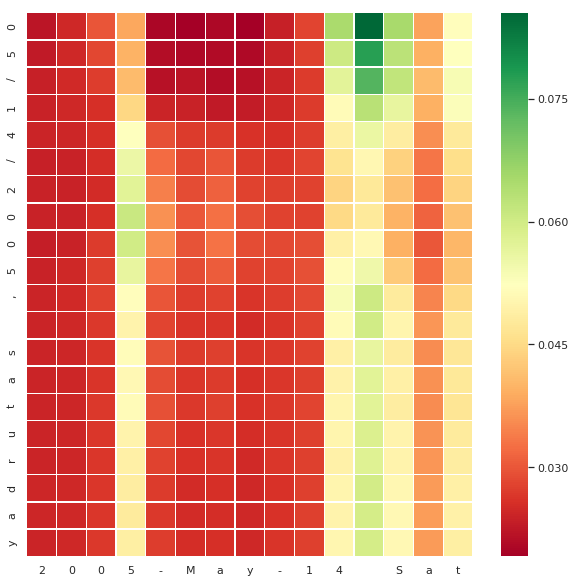

In [7]:
example = [gen_date() for _ in range(1)]
plot_attention(model, example, char_indices, indices_char, in_seq_len)